## Rendu Transformers

### Exercice 3: Self-Attention mechanism: Compute word embeddings

- Use a different sentence to compute word embeddings. Tokenize the sentence and create embeddings using a different method (e.g., Word2Vec or GloVe). Compute the query, key, and value matrices for these new embeddings and visualize the results.
- Change the method for initializing weights for the query, key, and value matrices. Use a different initialization technique (e.g., Xavier initialization) and compute the attention scores and attention weights. Visualize and discuss the impact of weight initialization on the self-attention mechanism.
- Implement a positional encoding mechanism for the sentence. Add positional encodings to the embeddings and compute the query, key, and value matrices. Visualize and explain the role of positional encoding in the self-attention mechanism.

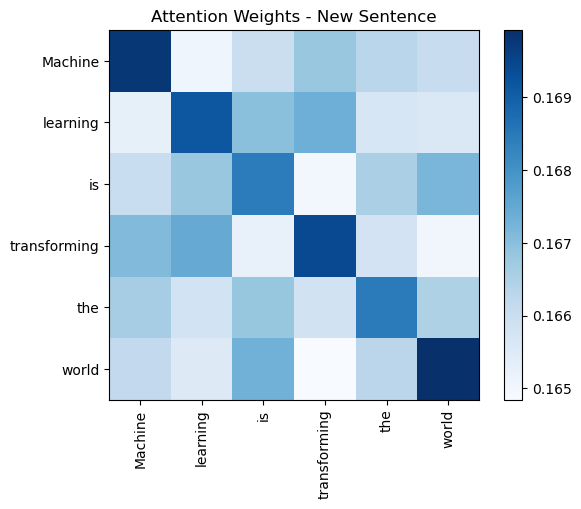

Output shape: (6, 8)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec


sentence = "Machine learning is transforming the world".split()
vocab_size = len(sentence)
embedding_dim = 8

model = Word2Vec([sentence], vector_size=8, min_count=1, epochs=100) # Entraînement Word2Vec
embeddings = np.array([model.wv[word] for word in sentence])  

# Calcul Q, K, V (ici identiques pour simplification)
Q, K, V = embeddings, embeddings, embeddings

def self_attention(Q, K, V):
    scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
    exp_scores = np.exp(scores - np.max(scores, axis=-1, keepdims=True))
    weights = exp_scores / np.sum(exp_scores, axis=-1, keepdims=True)
    output = np.dot(weights, V)
    return weights, output

def visualize_attention(weights, sentence, title):
    plt.imshow(weights, cmap='Blues')
    plt.xticks(range(len(sentence)), sentence, rotation=90)
    plt.yticks(range(len(sentence)), sentence)
    plt.title(title)
    plt.colorbar()
    plt.show()

weights, output = self_attention(Q, K, V)
visualize_attention(weights, sentence, "Attention Weights - New Sentence")
print(f"Output shape: {output.shape}")


### 2. Changer l’initialisation des poids (Xavier initialization)

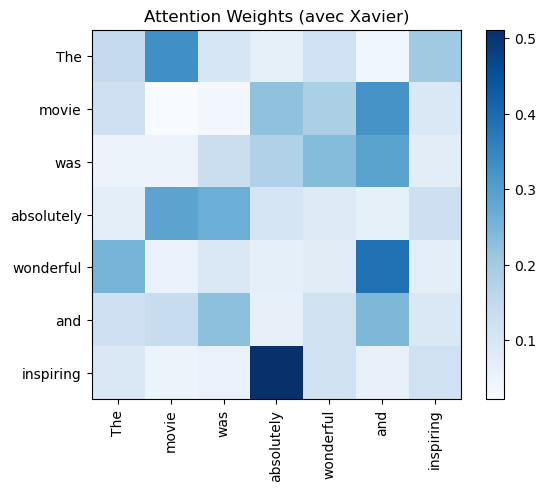

In [26]:
def xavier_init(size_in, size_out):
    limit = np.sqrt(6 / (size_in + size_out))
    return np.random.uniform(-limit, limit, (size_in, size_out))

d_model = embedding_dim
d_head = embedding_dim

Wq = xavier_init(d_model, d_head)
Wk = xavier_init(d_model, d_head)
Wv = xavier_init(d_model, d_head)

Q = np.dot(embeddings, Wq)
K = np.dot(embeddings, Wk)
V = np.dot(embeddings, Wv)

weights, output = self_attention(Q, K, V)
visualize_attention(weights, sentence, "Attention Weights (avec Xavier)")


### 3. Ajouter un encodage positionnel

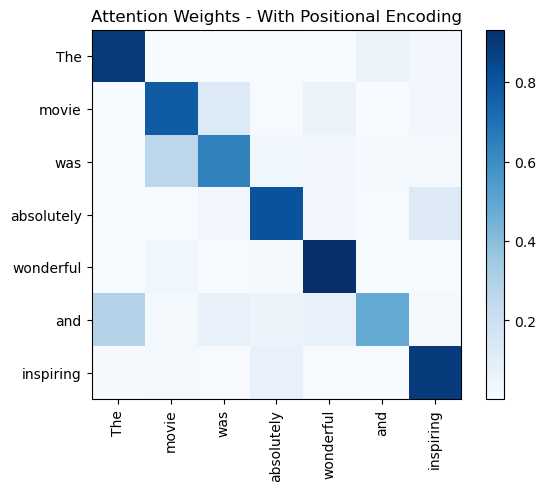

In [27]:
def positional_encoding(seq_len, d_model):
    PE = np.zeros((seq_len, d_model))
    for pos in range(seq_len):
        for i in range(0, d_model, 2):
            PE[pos, i] = np.sin(pos / (10000 ** (i / d_model)))
            if i+1 < d_model:
                PE[pos, i+1] = np.cos(pos / (10000 ** (i / d_model)))
    return PE

PE = positional_encoding(len(sentence), embedding_dim)
embeddings_pe = embeddings + PE

Q, K, V = embeddings_pe, embeddings_pe, embeddings_pe
weights, output = self_attention(Q, K, V)
visualize_attention(weights, sentence, "Attention Weights - With Positional Encoding")


## Exercice 4: Self-Attention mechanism: Varying Parameters

- Modify the dimensionality of the embeddings for a given sentence. Experiment with embedding dimensions of 4, 8, and 16. Compute the query, key, and value matrices for each case. Visualize and compare the attention weights and outputs for different embedding dimensions.
- Change the number of attention heads to 4 and implement the multi-head attention mechanism. Compute and visualize the attention weights and output. Compare the results with single-head and two-head attention.
- Implement dropout in the attention mechanism. Apply dropout to the attention weights before computing the final attention output. Visualize the results with and without dropout and discuss the impact on the attention mechanism.

### 1. Modifier la dimension des embeddings

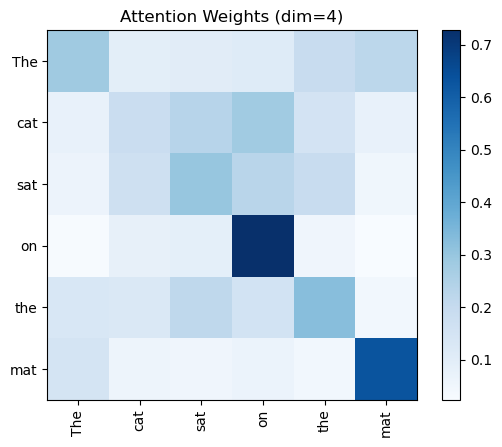

Dimension 4: output shape = (6, 4)


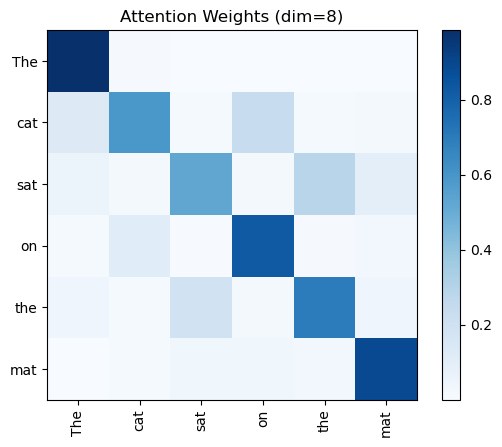

Dimension 8: output shape = (6, 8)


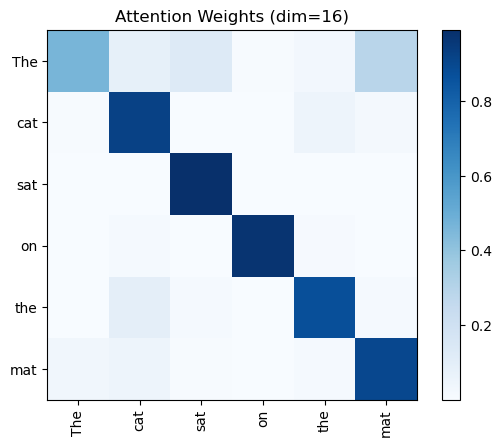

Dimension 16: output shape = (6, 16)


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def self_attention(Q, K, V):
    scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
    exp_scores = np.exp(scores - np.max(scores, axis=-1, keepdims=True))
    weights = exp_scores / np.sum(exp_scores, axis=-1, keepdims=True)
    output = np.dot(weights, V)
    return weights, output

def visualize_attention(weights, sentence, title):
    plt.imshow(weights, cmap='Blues')
    plt.xticks(range(len(sentence)), sentence, rotation=90)
    plt.yticks(range(len(sentence)), sentence)
    plt.title(title)
    plt.colorbar()
    plt.show()

sentence = "The cat sat on the mat".split()
dims = [4, 8, 16]

for d in dims:
    embeddings = np.random.randn(len(sentence), d)
    Q, K, V = embeddings, embeddings, embeddings
    weights, output = self_attention(Q, K, V)
    visualize_attention(weights, sentence, f"Attention Weights (dim={d})")
    print(f"Dimension {d}: output shape = {output.shape}")


#### Observations :

- Plus la dimension augmente, les vecteurs contiennent plus d’informations.

- L’attention devient plus riche mais aussi plus coûteuse en calcul.

### 2. Multi-Head Attention

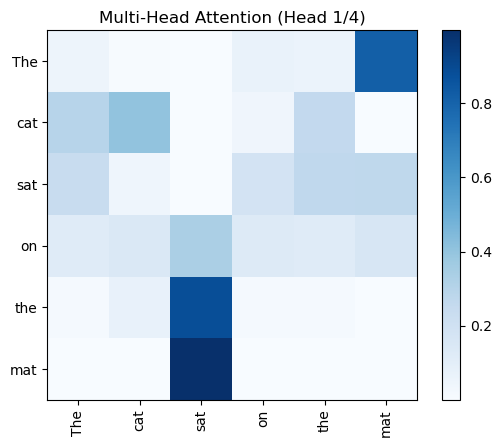

Multi-head output shape: (6, 8)


In [6]:
def multi_head_attention(X, num_heads=4):
    d_model = X.shape[1]
    d_head = d_model // num_heads
    heads_output = []
    all_weights = []

    for i in range(num_heads):
        Wq = np.random.randn(d_model, d_head)
        Wk = np.random.randn(d_model, d_head)
        Wv = np.random.randn(d_model, d_head)

        Q = np.dot(X, Wq)
        K = np.dot(X, Wk)
        V = np.dot(X, Wv)

        weights, out = self_attention(Q, K, V)
        heads_output.append(out)
        all_weights.append(weights)

    final_output = np.concatenate(heads_output, axis=1)
    return np.array(all_weights), final_output

embeddings = np.random.randn(len(sentence), 8)
weights_multi, output_multi = multi_head_attention(embeddings, num_heads=4)
visualize_attention(weights_multi[0], sentence, "Multi-Head Attention (Head 1/4)")
print(f"Multi-head output shape: {output_multi.shape}")


#### Observations :

- Chaque tête capture des relations différentes entre les mots.

- Multi-head améliore la compréhension contextuelle par rapport à une seule tête.

### 3. Dropout dans l’attention

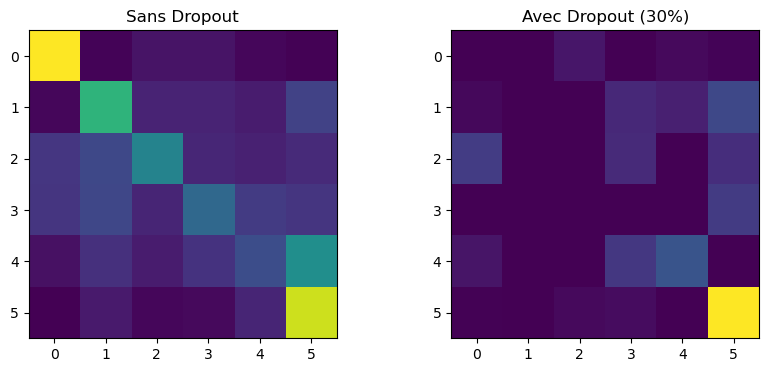

In [8]:
def apply_dropout(weights, dropout_rate=0.3):
    mask = np.random.binomial(1, 1 - dropout_rate, size=weights.shape)
    return weights * mask / (1 - dropout_rate)

embeddings = np.random.randn(len(sentence), 8)
Q, K, V = embeddings, embeddings, embeddings
weights, output = self_attention(Q, K, V)

weights_dropout = apply_dropout(weights, 0.3)
output_dropout = np.dot(weights_dropout, V)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(weights,  cmap='viridis')
plt.title("Sans Dropout")
plt.subplot(1,2,2)
plt.imshow(weights_dropout,  cmap='viridis')
plt.title("Avec Dropout (30%)")
plt.show()


#### Observations :

- Certaines connexions d’attention sont supprimées aléatoirement.

- Cela rend le modèle plus robuste et réduit le risque de surapprentissage.

### Exercice 5: Self-Attention mechanism: Advanced Techniques

- Implement layer normalization before and after the attention mechanism. Compare the results of both approaches by visualizing the attention weights and outputs. Discuss the impact of layer normalization on the self-attention mechanism.
- Experiment with different activation functions in the feed-forward layer following the attention mechanism. Replace ReLU with other functions (e.g., Leaky ReLU, ELU). Compute and visualize the attention outputs for each activation function and compare the results.
- Implement a mechanism to handle variable-length sequences using masking. Compute the attention scores and apply the mask to ignore padding tokens. Visualize the attention weights and outputs with and without masking and discuss the differences.

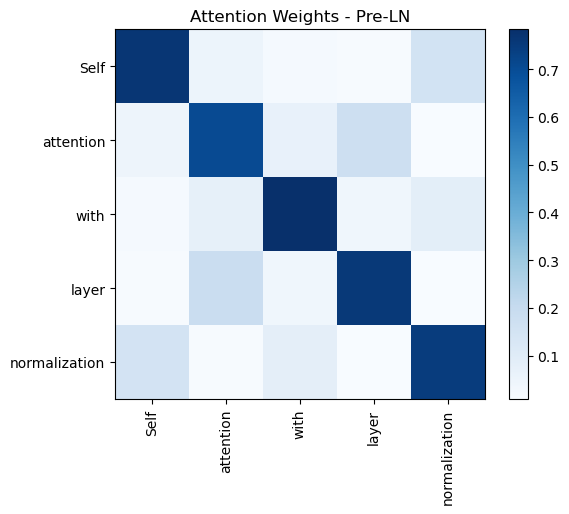

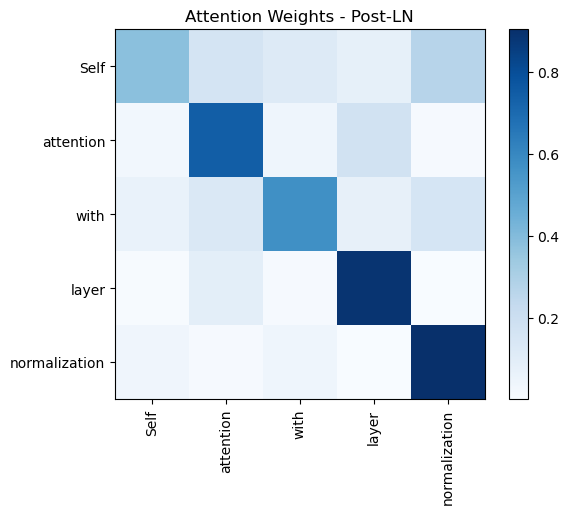

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Layer Normalization 
def layer_norm(X, eps=1e-6):
    mean = X.mean(axis=-1, keepdims=True)
    std = X.std(axis=-1, keepdims=True)
    return (X - mean) / (std + eps)

# Self-Attention 
def self_attention(Q, K, V):
    scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
    exp_scores = np.exp(scores - np.max(scores, axis=-1, keepdims=True))
    weights = exp_scores / np.sum(exp_scores, axis=-1, keepdims=True)
    output = np.dot(weights, V)
    return weights, output

# Phrase de test
sentence = "Self attention with layer normalization".split()
embedding_dim = 8
embeddings = np.random.randn(len(sentence), embedding_dim)

# Pre-LN
Q, K, V = layer_norm(embeddings), layer_norm(embeddings), layer_norm(embeddings)
weights_pre, output_pre = self_attention(Q, K, V)

# Post-LN
Q, K, V = embeddings, embeddings, embeddings
weights_post, output_post = self_attention(Q, K, V)
output_post = layer_norm(output_post)

# ---- Visualisation ----
def visualize_attention(weights, sentence, title):
    plt.imshow(weights, cmap='Blues')
    plt.xticks(range(len(sentence)), sentence, rotation=90)
    plt.yticks(range(len(sentence)), sentence)
    plt.title(title)
    plt.colorbar()
    plt.show()

visualize_attention(weights_pre, sentence, "Attention Weights - Pre-LN")
visualize_attention(weights_post, sentence, "Attention Weights - Post-LN")


#### Observations :

- LN réduit la variance des vecteurs, ce qui rend l’attention plus stable.

- Pre-LN peut accélérer la convergence, Post-LN peut améliorer la robustesse après la combinaison des sorties.

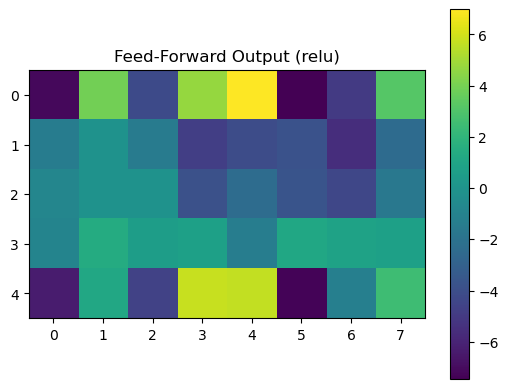

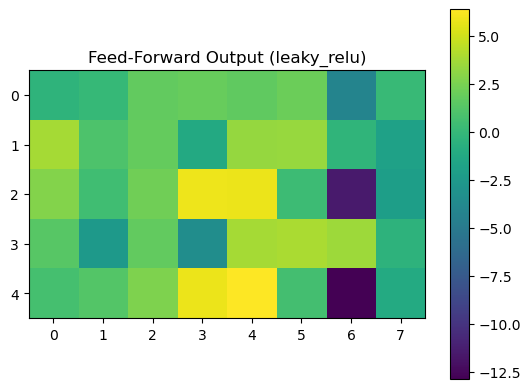

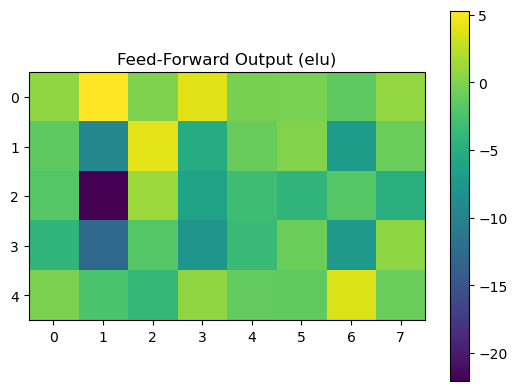

In [13]:
# Différentes fonctions d’activation dans le feed-forward

# Feed-forward simple
def feed_forward(X, activation='relu'):
    W1 = np.random.randn(X.shape[1], X.shape[1])
    W2 = np.random.randn(X.shape[1], X.shape[1])
    
    Z = np.dot(X, W1)
    
    if activation == 'relu':
        A = np.maximum(0, Z)
    elif activation == 'leaky_relu':
        A = np.where(Z > 0, Z, 0.01*Z)
    elif activation == 'elu':
        A = np.where(Z > 0, Z, np.exp(Z) - 1)
    else:
        A = Z
    
    return np.dot(A, W2)

# Exemple avec les sorties d'attention
outputs = {}
for act in ['relu', 'leaky_relu', 'elu']:
    outputs[act] = feed_forward(output_pre, activation=act)

# Visualisation des activations
for act in outputs:
    plt.imshow(outputs[act], cmap='viridis')
    plt.title(f"Feed-Forward Output ({act})")
    plt.colorbar()
    plt.show()


#### Observations :

- Différentes activations changent la distribution de sortie.

- ELU ou Leaky ReLU peuvent aider à éviter le problème des neurones « morts » que ReLU peut créer.

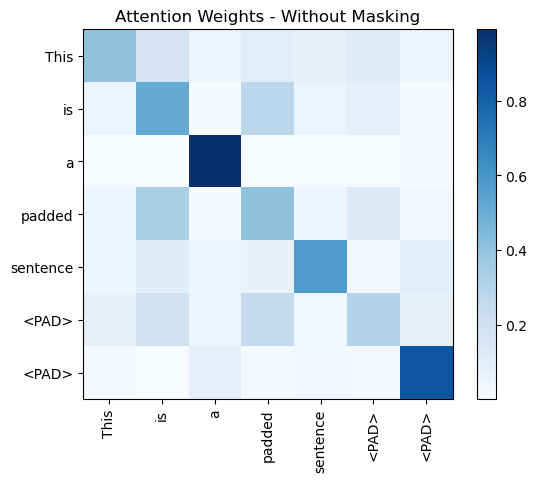

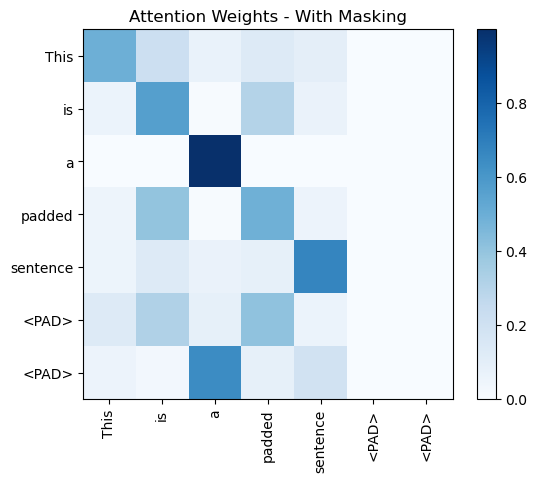

In [15]:
# Mask Attention

def masked_attention(Q, K, V, mask):
    scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
    scores = np.where(mask, scores, -1e9)  # score très faible pour les padding
    exp_scores = np.exp(scores - np.max(scores, axis=-1, keepdims=True))
    weights = exp_scores / np.sum(exp_scores, axis=-1, keepdims=True)
    output = np.dot(weights, V)
    return weights, output

# Exemple
sentence = ["This", "is", "a", "padded", "sentence", "<PAD>", "<PAD>"]
embeddings = np.random.randn(len(sentence), embedding_dim)

# mask: True pour les tokens valides, False pour <PAD>
mask = np.array([[True]*5 + [False]*2]*len(sentence))

weights_masked, output_masked = masked_attention(embeddings, embeddings, embeddings, mask)
weights_unmasked, output_unmasked = self_attention(embeddings, embeddings, embeddings)

# Visualisation
visualize_attention(weights_unmasked, sentence, "Attention Weights - Without Masking")
visualize_attention(weights_masked, sentence, "Attention Weights - With Masking")


==> Sans masque, les tokens <PAD> influencent l’attention et peuvent perturber la sortie.

==> Avec le masque, les poids d’attention ignorent le padding, produisant des résultats corrects pour séquences variables.

### Exercice 6: Self-Attention mechanism: Applications

- Apply the self-attention mechanism to a sentence with named entities (e.g., "Barack Obama was the 44th president of the United States"). Compute the query, key, and value matrices, and visualize the attention weights. Discuss how the self-attention mechanism handles named entities.
- Use the self-attention mechanism for a sequence-to-sequence task (e.g., translation). Compute the attention weights for both the encoder and decoder sequences. Visualize the results and discuss how the attention mechanism captures the relationships between input and output sequences.
- Implement a self-attention mechanism for a text classification task. Compute the attention weights for a sentence and use the final attention output as features for classification. Visualize the attention weights and discuss how the self-attention mechanism helps in identifying important features for classification.

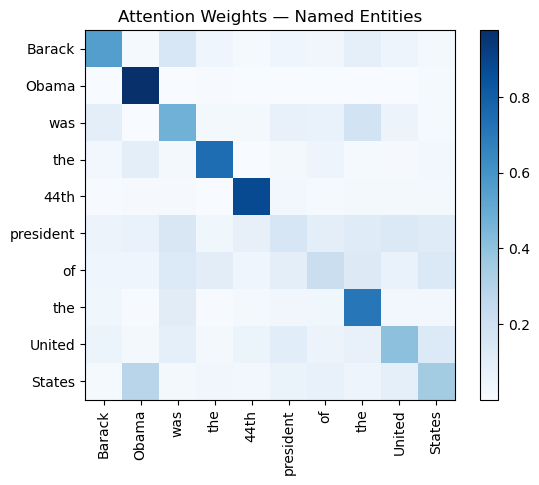

In [45]:
import numpy as np
import matplotlib.pyplot as plt


def self_attention(Q, K, V):
    scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
    exp_scores = np.exp(scores - np.max(scores, axis=-1, keepdims=True))
    weights = exp_scores / np.sum(exp_scores, axis=-1, keepdims=True)
    output = np.dot(weights, V)
    return weights, output


def visualize_attention(weights, sentence, title):
    plt.imshow(weights, cmap='Blues')
    plt.xticks(range(len(sentence)), sentence, rotation=90)
    plt.yticks(range(len(sentence)), sentence)
    plt.title(title)
    plt.colorbar()
    plt.show()

    

########## Entités nommées (NER) #############

sentence = "Barack Obama was the 44th president of the United States".split()
embedding_dim = 8


embeddings = np.random.randn(len(sentence), embedding_dim)

Q, K, V = embeddings, embeddings, embeddings
weights, output = self_attention(Q, K, V)

visualize_attention(weights, sentence, "Attention Weights — Named Entities")


#### Observations 

- On remarque une zone bleu foncé dans la partie supérieure gauche du graphe, indiquant une forte attention mutuelle entre ces deux tokens ==> Cela traduit la capacité du self-attention à lier correctement les mots appartenant à une même entité sémantique, ici un nom propre complet.

- Les mots “Barack” et “Obama” présentent une forte attention mutuelle, ce qui montre que le mécanisme identifie correctement qu’ils forment une même entité sémantique.

- Les mots de liaison (was, the, of, the) reçoivent des poids d’attention faibles ==> le modèle apprend implicitement à ignorer les mots grammaticaux au profit des mots porteurs de sens.

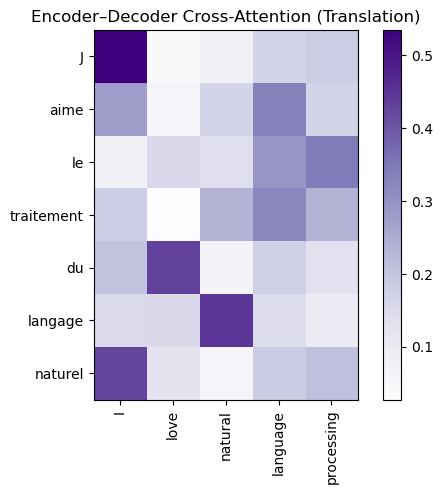

In [58]:
# Traduction (Seq2Seq)

encoder_sentence = "I love natural language processing".split()
decoder_sentence = "J aime le traitement du langage naturel".split()

d_model = 8

encoder_embeddings = np.random.randn(len(encoder_sentence), d_model)
decoder_embeddings = np.random.randn(len(decoder_sentence), d_model)

# Attention croisée (Decoder -> Encoder) 
def cross_attention(Q, K, V):
    scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
    exp_scores = np.exp(scores - np.max(scores, axis=-1, keepdims=True))
    weights = exp_scores / np.sum(exp_scores, axis=-1, keepdims=True)
    output = np.dot(weights, V)
    return weights, output

weights_cross, output_cross = cross_attention(decoder_embeddings, encoder_embeddings, encoder_embeddings)

plt.imshow(weights_cross, cmap='Purples')
plt.xticks(range(len(encoder_sentence)), encoder_sentence, rotation=90)
plt.yticks(range(len(decoder_sentence)), decoder_sentence)
plt.title("Encoder–Decoder Cross-Attention (Translation)")
plt.colorbar()
plt.show()


- Chaque mot du décodeur regarde les mots du codeur pertinents 

"J" → "I"                    
"traitement" → "processing"  
- Les poids forts révèlent comment le modèle apprend le dictionnaire implicite entre les deux langues.

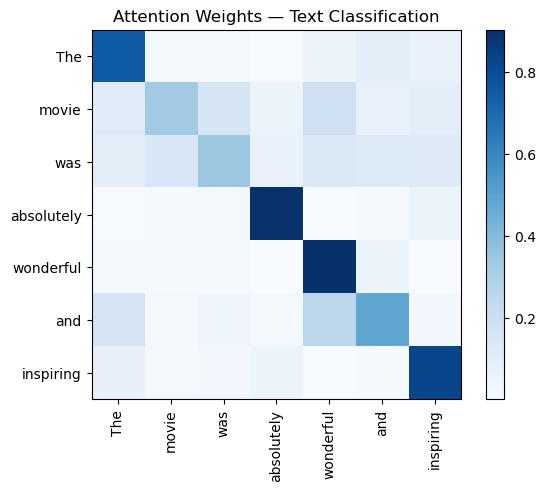

Prédiction simulée : Positif


In [59]:
# Self-Attention pour la classification de texte ===>  classification sentiment (positif/négatif)

from sklearn.linear_model import LogisticRegression

sentence = "The movie was absolutely wonderful and inspiring".split()
embeddings = np.random.randn(len(sentence), 8)

Q, K, V = embeddings, embeddings, embeddings
weights, output = self_attention(Q, K, V)

# ---- Agrégation (pooling de la sortie d'attention) ----
sentence_embedding = np.mean(output, axis=0).reshape(1, -1)

clf = LogisticRegression()

# On simule un entraînement sur un petit jeu fictif :
X_train = np.random.randn(5, 8)
y_train = np.array([1, 0, 1, 0, 1])
clf.fit(X_train, y_train)

prediction = clf.predict(sentence_embedding)
visualize_attention(weights, sentence, "Attention Weights — Text Classification")
print(f"Prédiction simulée : { 'Positif' if prediction[0]==1 else 'Négatif' }")


- Les mots “wonderful” et “inspiring” ont des poids d’attention très élevés : le mécanisme les identifie comme porteurs du sentiment principal.

- Les mots neutres ou syntaxiques (“the”, “was”, “and”) ont des poids très faibles ; le modèle apprend à filtrer le bruit contextuel.


Conclusion :

- self-attention agit ici comme un sélecteur automatique de caractéristiques pertinentes, en pondérant l’importance de chaque mot selon son rôle dans la décision de classification.